In [1]:
#!pip3 install lightgbm

In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score
import lightgbm as lgb


In [195]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [196]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [197]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [198]:
train.duplicated().sum()

0

In [199]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

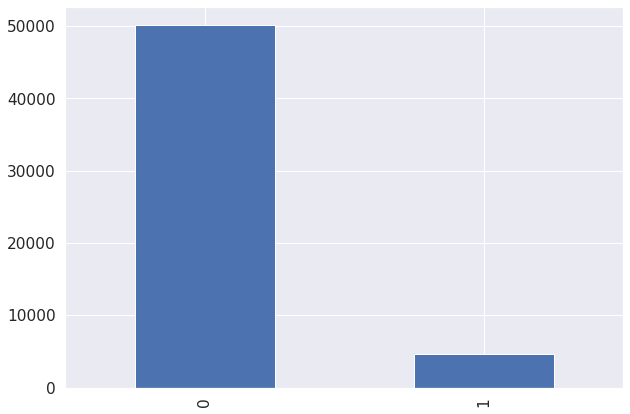

In [200]:
rcParams['figure.figsize'] = 10, 7
train['is_promoted'].value_counts().plot(kind="bar")

#### This clearly shoes that the dataset is imbalaced and we need to use some fold methods to train the model

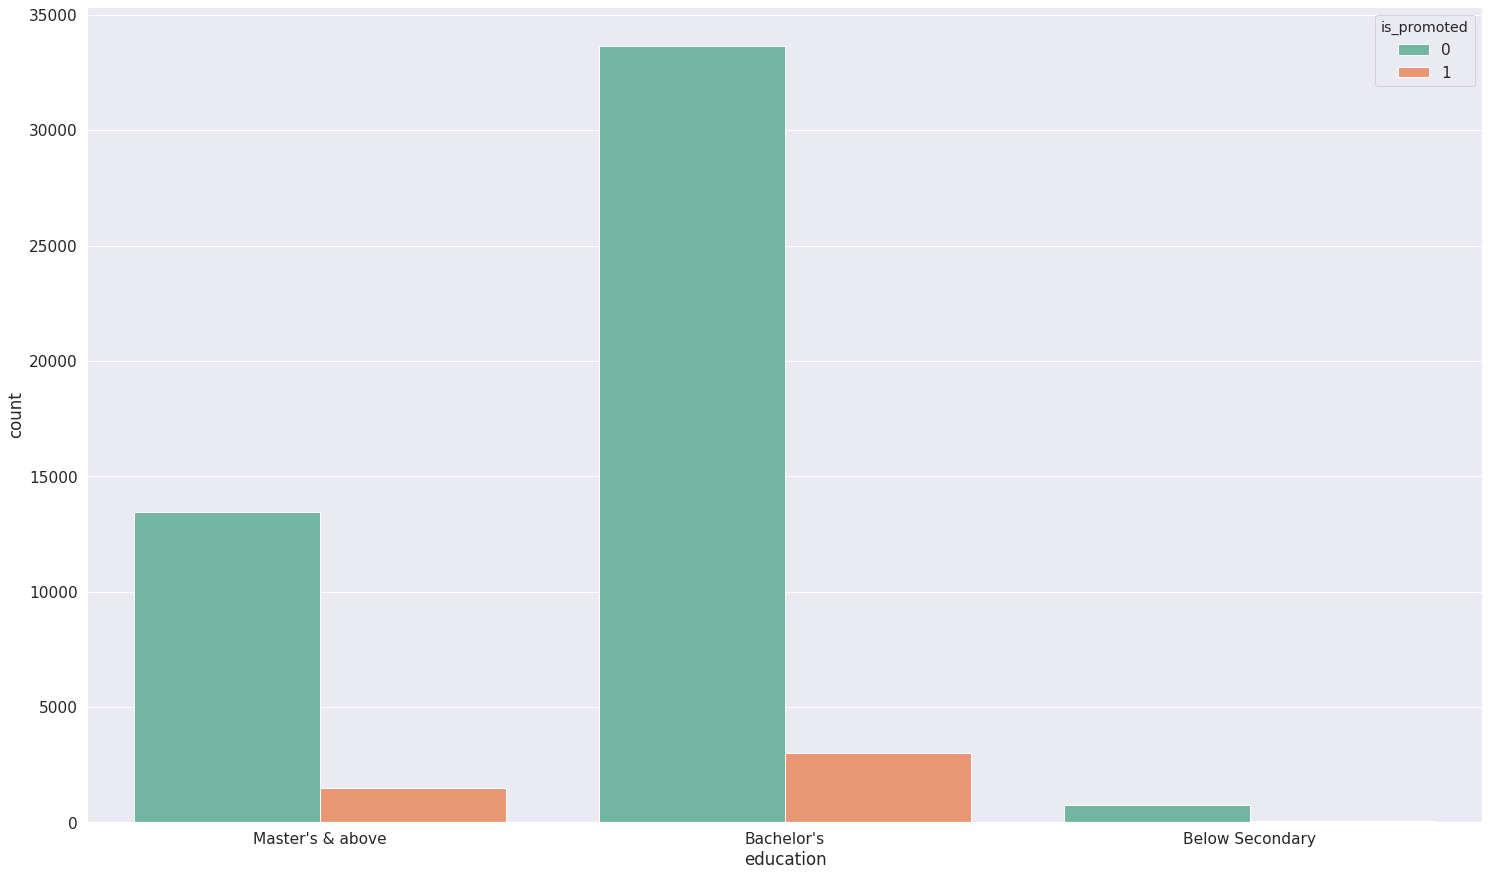

In [201]:
rcParams['figure.figsize'] = 25,15
sns.countplot(x=train['education'],hue=train['is_promoted'],palette="Set2")

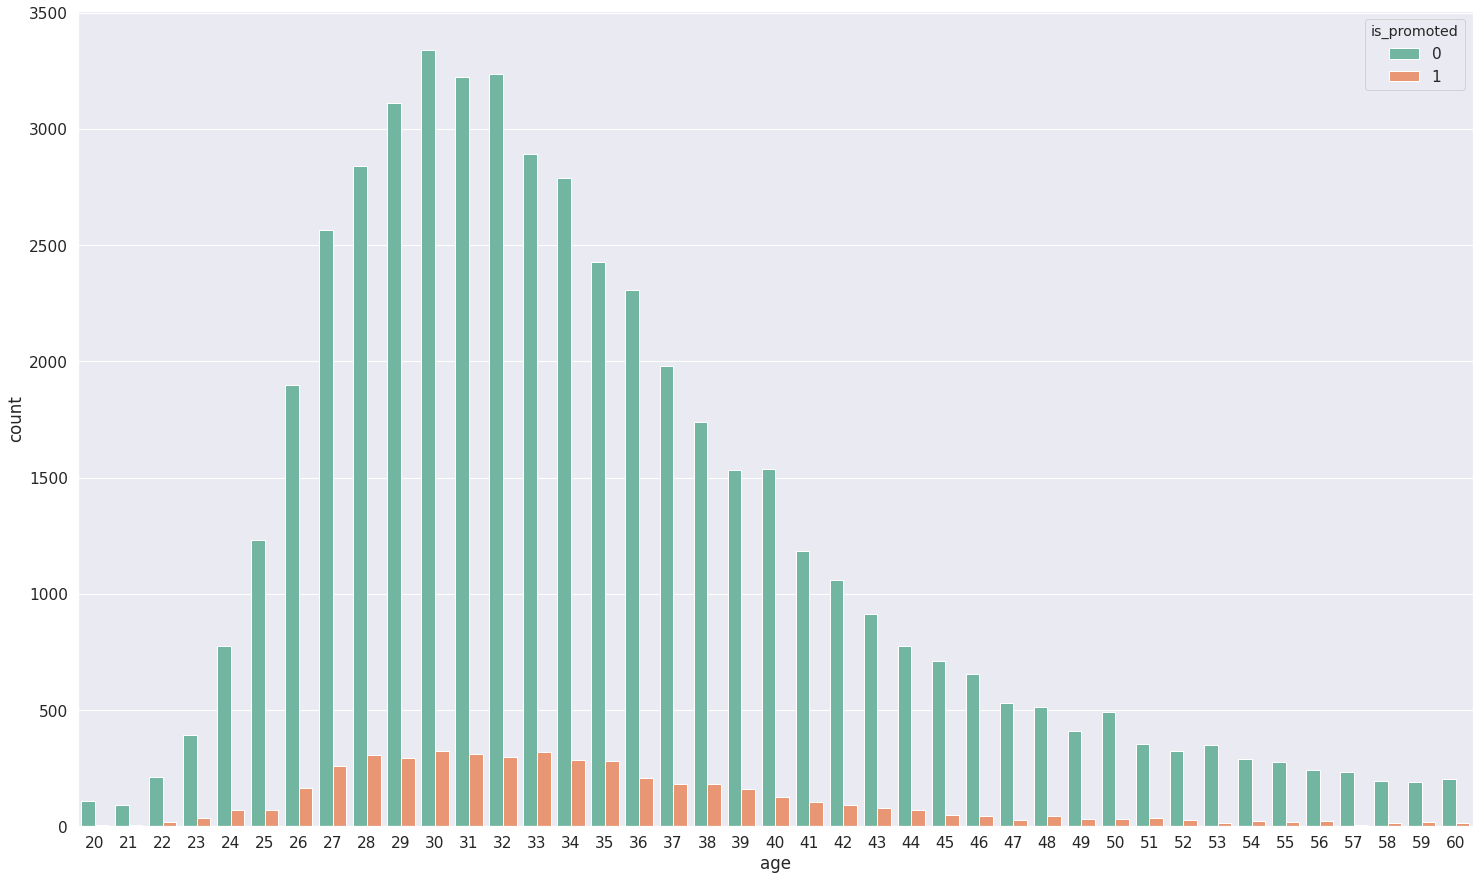

In [202]:
rcParams['figure.figsize'] = 25,15
sns.countplot(x=train['age'],hue=train['is_promoted'],palette="Set2")

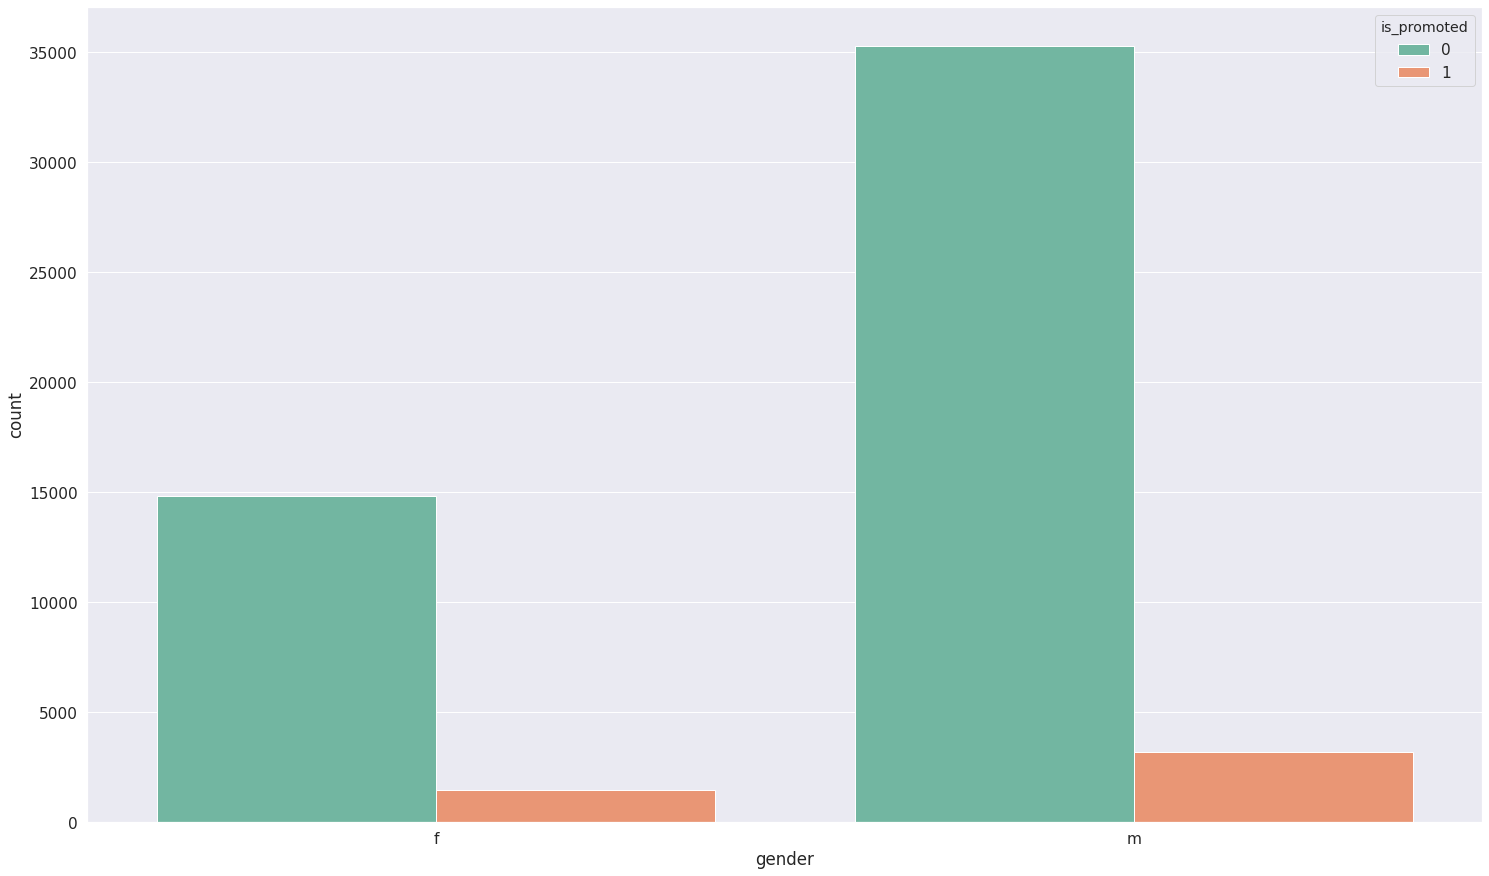

In [203]:
rcParams['figure.figsize'] = 25,15
sns.countplot(x=train['gender'],hue=train['is_promoted'],palette="Set2")

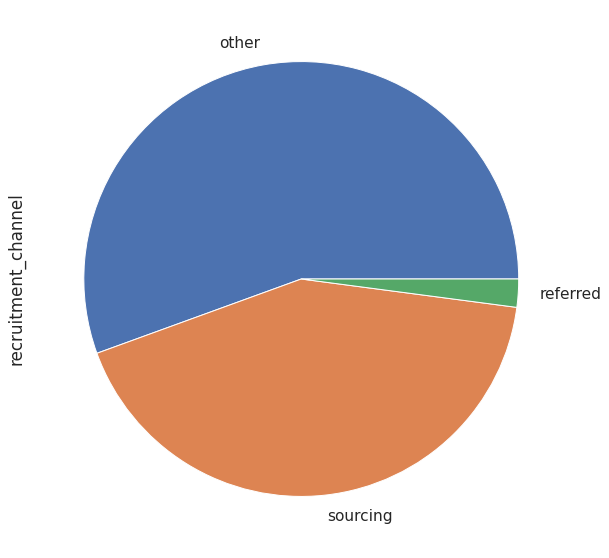

In [204]:
rcParams['figure.figsize'] = 10,10
train['recruitment_channel'].value_counts().plot(kind="pie")

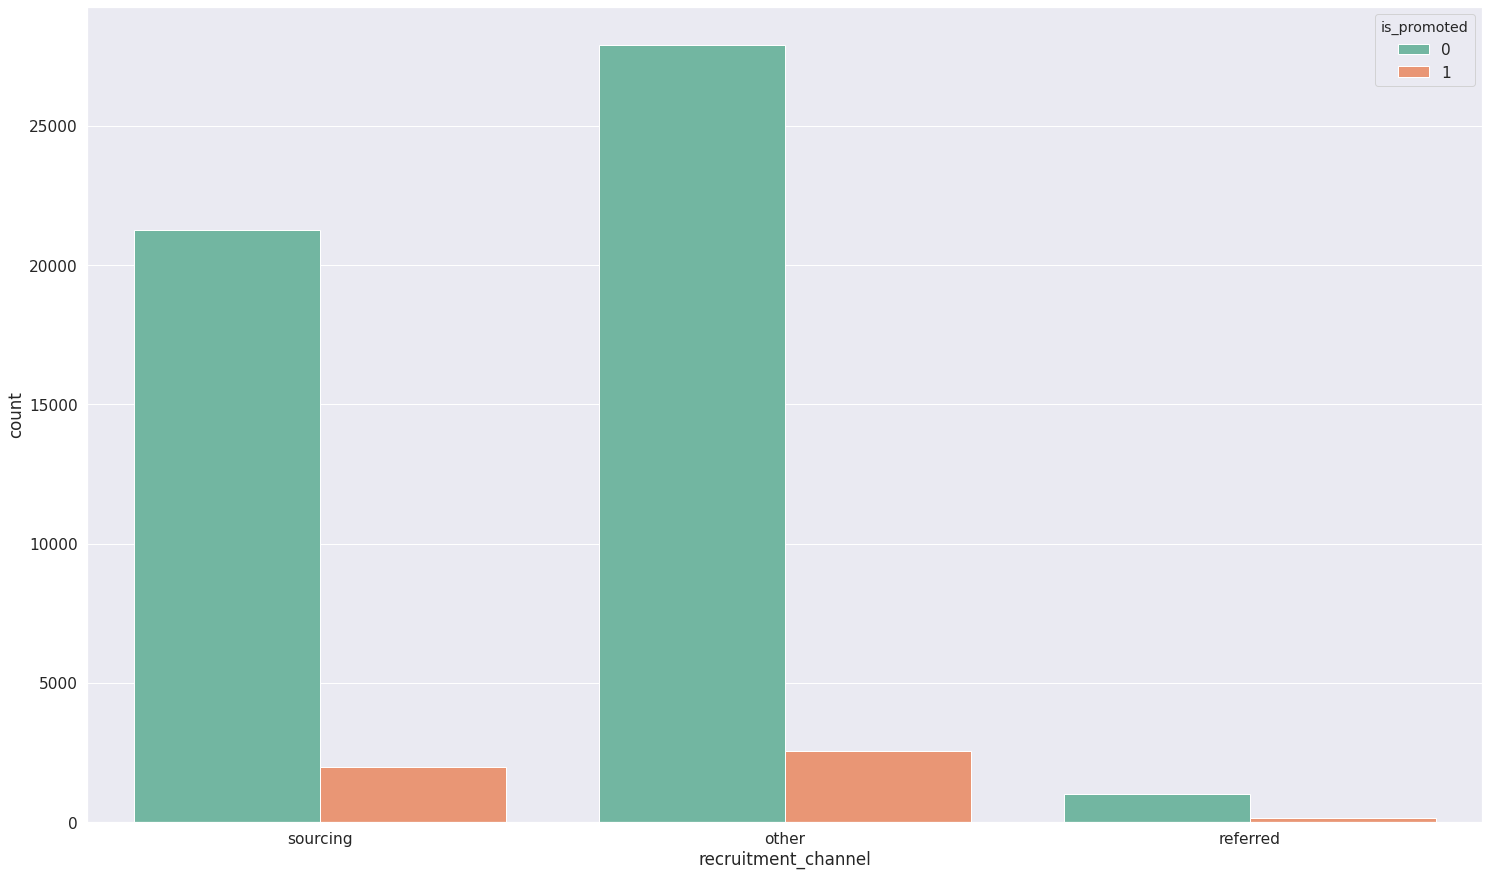

In [205]:
rcParams['figure.figsize'] = 25,15
sns.countplot(x=train['recruitment_channel'],hue=train['is_promoted'],palette="Set2")

/home/pcuser/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pcuser/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pcuser/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/pcuser/.local/lib/python3.6/site-packages/pa

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82649d73c8>,
      dtype=object)

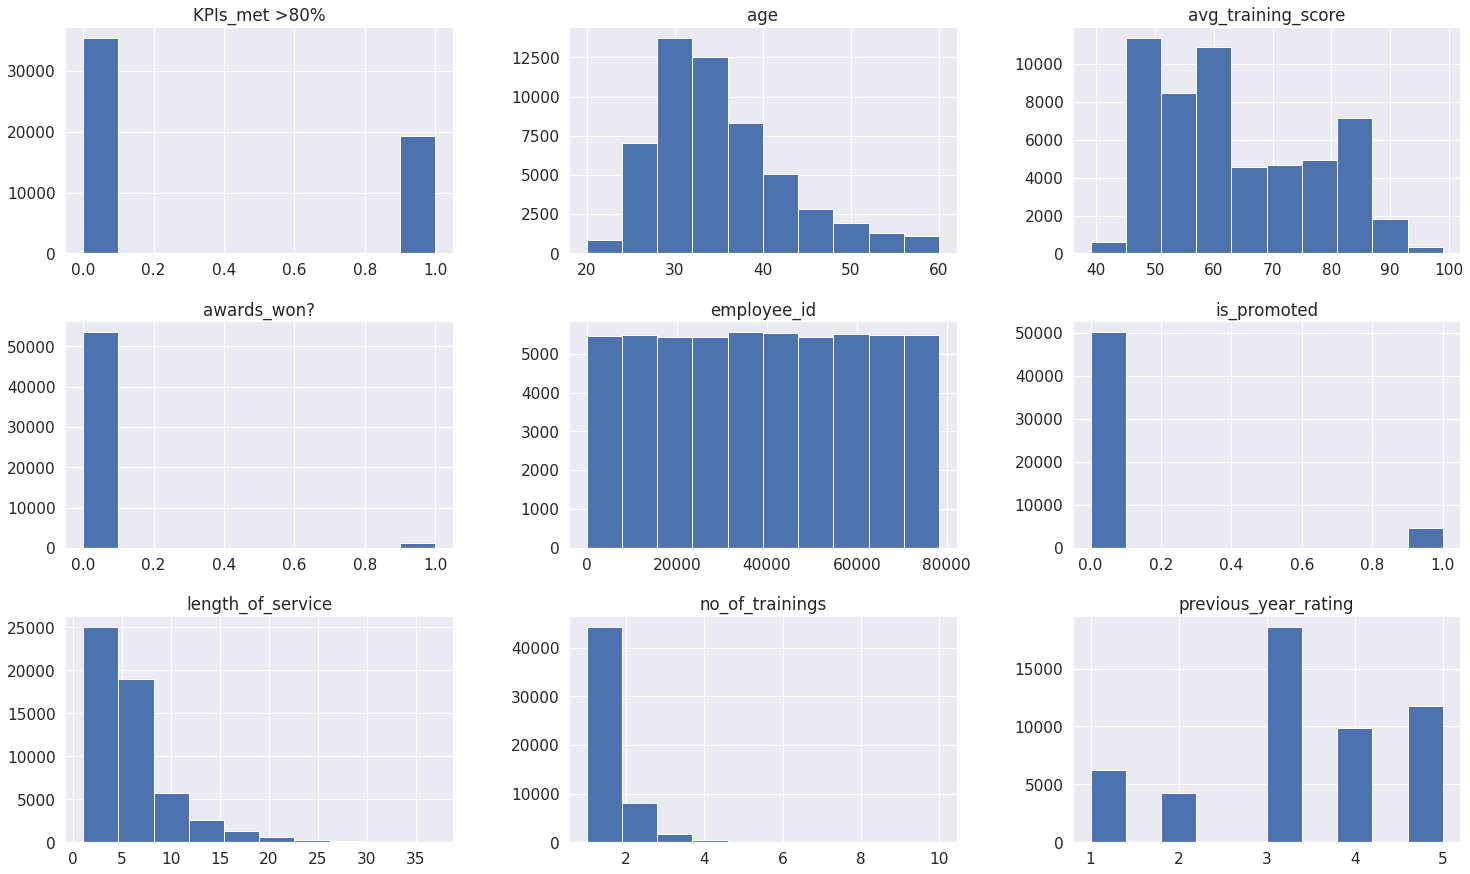

In [206]:
train.hist()

In [207]:
avg_train = np.log(train['avg_training_score'])

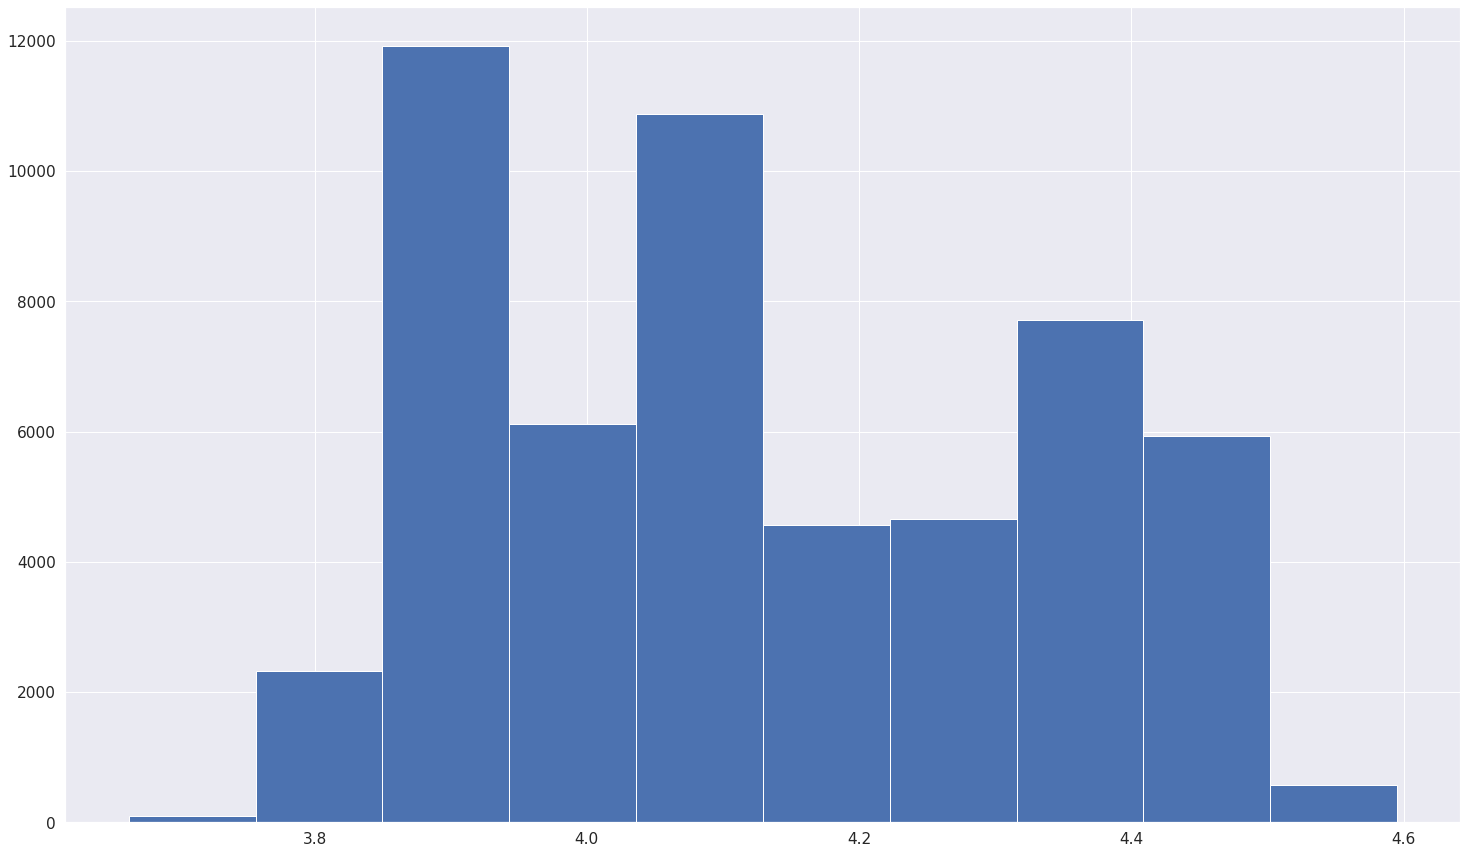

In [208]:
avg_train.hist()

**Analysis and Visuvalization**

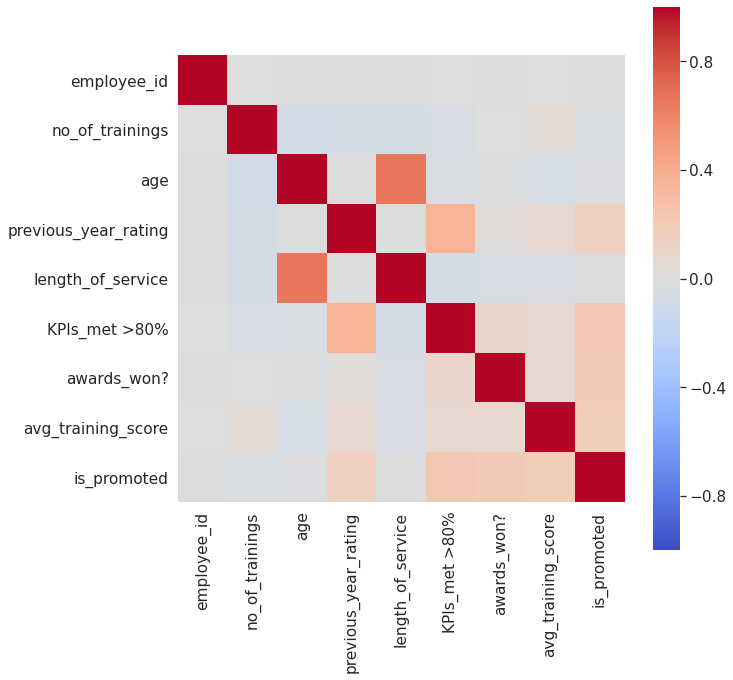

In [209]:
corr = train.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap='coolwarm',square=True)


In [210]:
# Age,lenght of service , KPI,awards won

(array([  870.,  7031., 13751., 12531.,  8300.,  5093.,  2861.,  1908.,
         1322.,  1141.]),
 array([20., 24., 28., 32., 36., 40., 44., 48., 52., 56., 60.]),
 <a list of 10 Patch objects>)

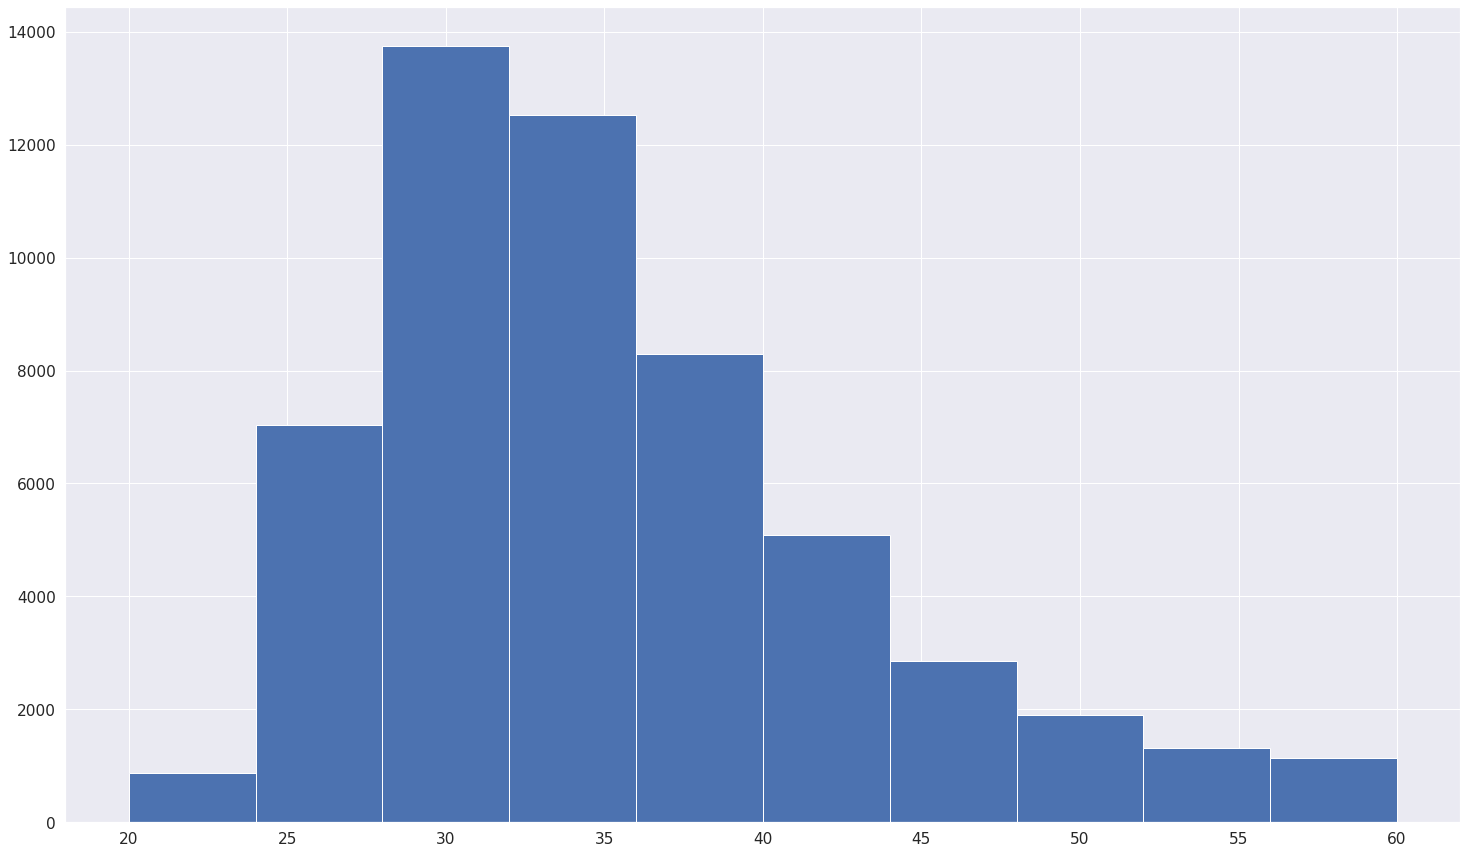

In [211]:
plt.hist(train['age'])

(array([53538.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1270.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

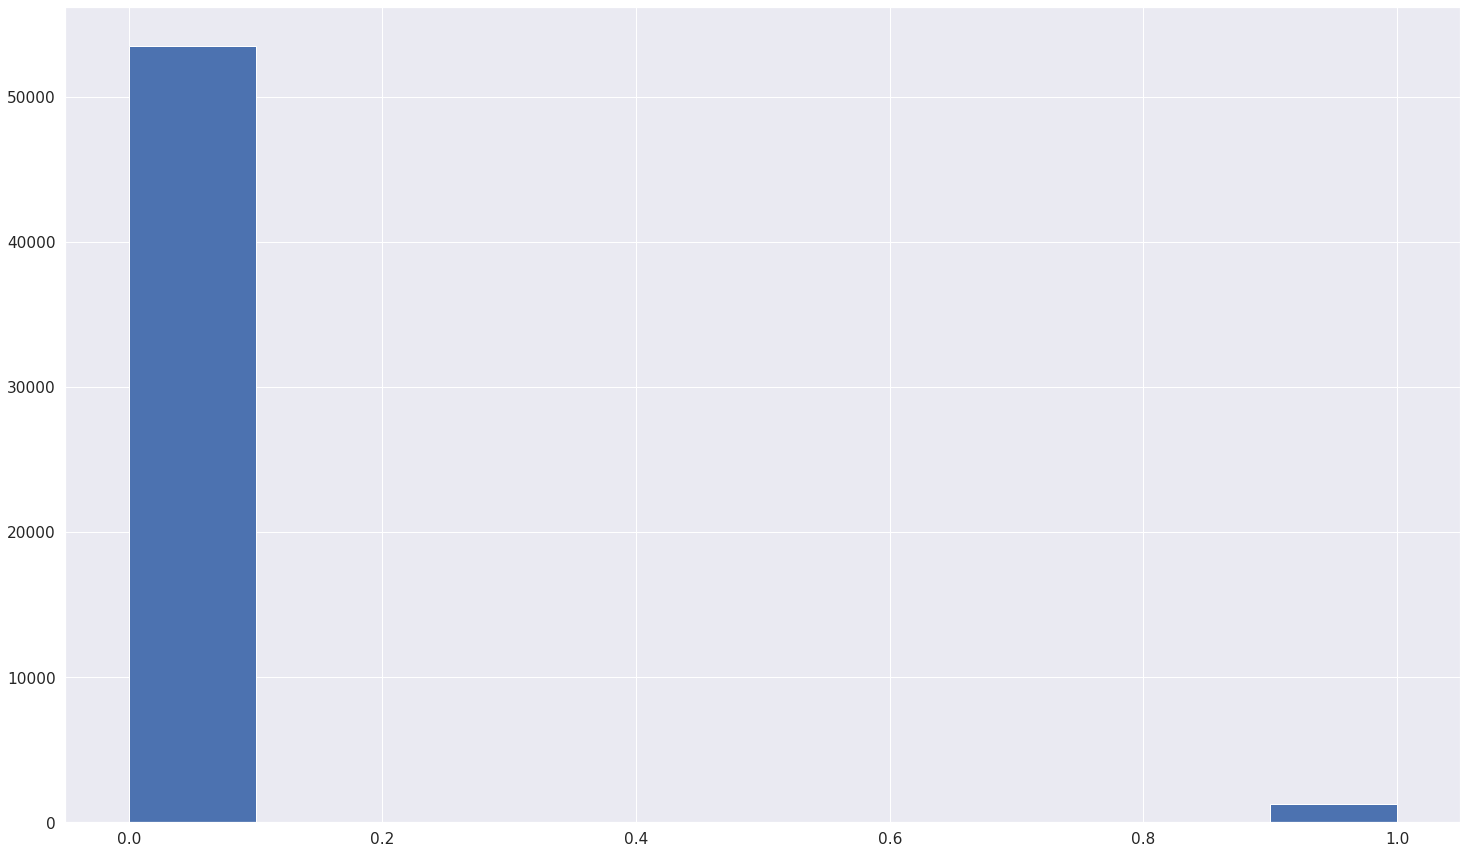

In [212]:
plt.hist(train['awards_won?'])

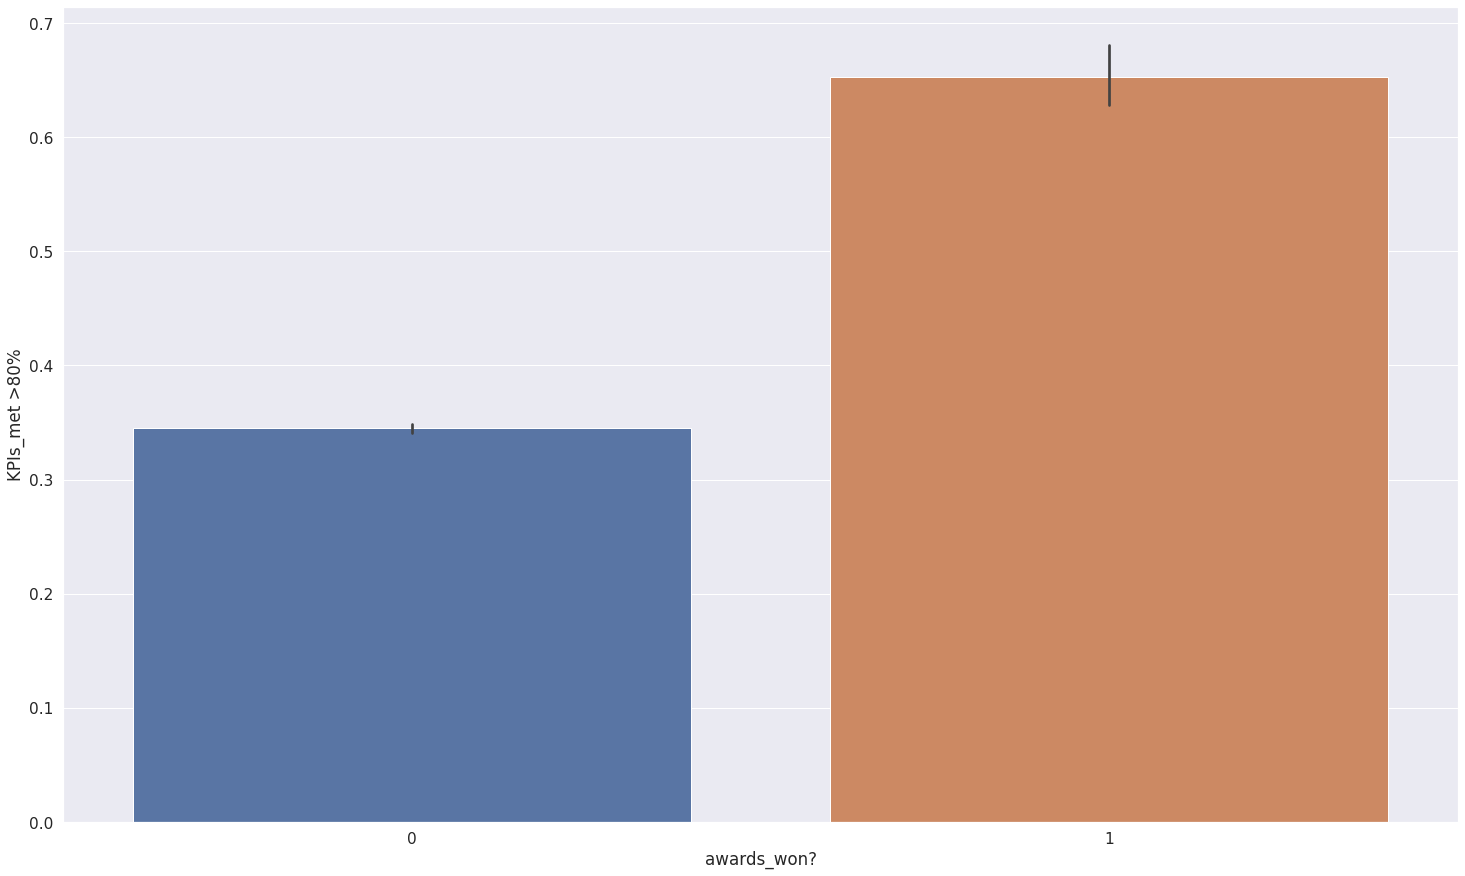

In [213]:
sns.barplot(x = 'awards_won?',y = 'KPIs_met >80%',data=train)

# Missing values
**Finding missing values**

In [214]:
train.isna().sum()


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

**This concludes the education and previous_year_rating column have missing values in them**

#Categorical feature can be imputed by mode or Bfill or Ffill
#Numerical feature can be treated by mean mode bfill or Ffill

In [215]:
print(train.isnull().sum())
print("***"*20)
print(test.isnull().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64
************************************************************
employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


In [216]:
train['education'].replace(np.nan,"Bachelor's",inplace=True)
test['education'].replace(np.nan,"Bachelor's",inplace=True)

In [217]:
train['education'].replace("Master's & above",3,inplace=True)
test['education'].replace("Master's & above",3,inplace=True)
train['education'].replace("Bachelor's",2,inplace=True)
test['education'].replace("Bachelor's",2,inplace=True)
train['education'].replace("Below Secondary",1,inplace=True)
test['education'].replace("Below Secondary",1,inplace=True)

In [218]:
train['previous_year_rating'].replace(np.nan,3.,inplace=True)
test['previous_year_rating'].replace(np.nan,3.,inplace=True)

In [219]:
train['sum_metric'] = train['awards_won?']+train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+test['KPIs_met >80%'] + test['previous_year_rating']

train['tot_score'] = train['avg_training_score'] * train['no_of_trainings']
test['tot_score'] = test['avg_training_score'] * test['no_of_trainings']

In [220]:
train[train['is_promoted']==1].groupby('previous_year_rating')['is_promoted'].count()
train.groupby('previous_year_rating')['is_promoted'].count()

previous_year_rating
1.0     6223
2.0     4225
3.0    22742
4.0     9877
5.0    11741
Name: is_promoted, dtype: int64

In [221]:
train.isna().sum()
test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
sum_metric              0
tot_score               0
dtype: int64

In [222]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,tot_score
0,65438,Sales & Marketing,region_7,3,f,sourcing,1,35,5.0,8,1,0,49,0,6.0,49
1,65141,Operations,region_22,2,m,other,1,30,5.0,4,0,0,60,0,5.0,60
2,7513,Sales & Marketing,region_19,2,m,sourcing,1,34,3.0,7,0,0,50,0,3.0,50
3,2542,Sales & Marketing,region_23,2,m,other,2,39,1.0,10,0,0,50,0,1.0,100
4,48945,Technology,region_26,2,m,other,1,45,3.0,2,0,0,73,0,3.0,73


In [223]:
#Treating Gender Column
# train['gender'].fillna(train['gender'].mode()[0], inplace = True)
# test['gender'].fillna(test['gender'].mode()[0],inplace = True)

#Treating recruitment_channel Column
# train['recruitment_channel'].fillna(train['recruitment_channel'].mode()[0], inplace = True)
# test['recruitment_channel'].fillna(test['recruitment_channel'].mode()[0],inplace = True)

#Treating no_of_trainings Column
# train['no_of_trainings'].fillna(train['no_of_trainings'].mode()[0],inplace = True)
# test['no_of_trainings'].fillna(test['no_of_trainings'].mode()[0],inplace = True)

#Treating age Column
# train['age'].fillna(np.ceil(train['age'].mean()),inplace = True)
# test['age'].fillna(np.ceil(train['age'].mean()),inplace = True)

#Treating length_of_service Column
# train['length_of_service'].fillna(np.ceil(train['length_of_service'].mean()),inplace = True)
# test['length_of_service'].fillna(np.ceil(test['length_of_service'].mean()),inplace = True)

#Treating KPIs_met Column
# train['KPIs_met >80%'].fillna(train['KPIs_met >80%'].mode()[0],inplace = True)
# test['KPIs_met >80%'].fillna(test['KPIs_met >80%'].mode()[0],inplace = True)

#Treating awards_won Column
# train['awards_won?'].fillna(train['awards_won?'].mode()[0],inplace = True)
# test['awards_won?'].fillna(test['awards_won?'].mode()[0],inplace = True)

#Treating avg_training_score Column
# train['avg_training_score'].fillna(train['avg_training_score'].mode()[0],inplace = True)
# test['avg_training_score'].fillna(test['avg_training_score'].mode()[0],inplace = True)

#Treating education Column
# train['education'].fillna(train['education'].mode()[0],inplace = True)
# test['education'].fillna(test['education'].mode()[0],inplace = True)

#Treating previous_year_rating Column
# train['previous_year_rating'].fillna(np.ceil(train['previous_year_rating'].mean()),inplace = True)
# test['previous_year_rating'].fillna(np.ceil(test['previous_year_rating'].mean()),inplace = True)

#Treating is_promoted Column
# train['is_promoted'].fillna(np.ceil(train['is_promoted'].mean()),inplace = True)

In [224]:
print(train.isnull().sum())
print("***"*20)
print(test.isnull().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
sum_metric              0
tot_score               0
dtype: int64
************************************************************
employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
sum_metric              0
tot_score               0
dtype: int64


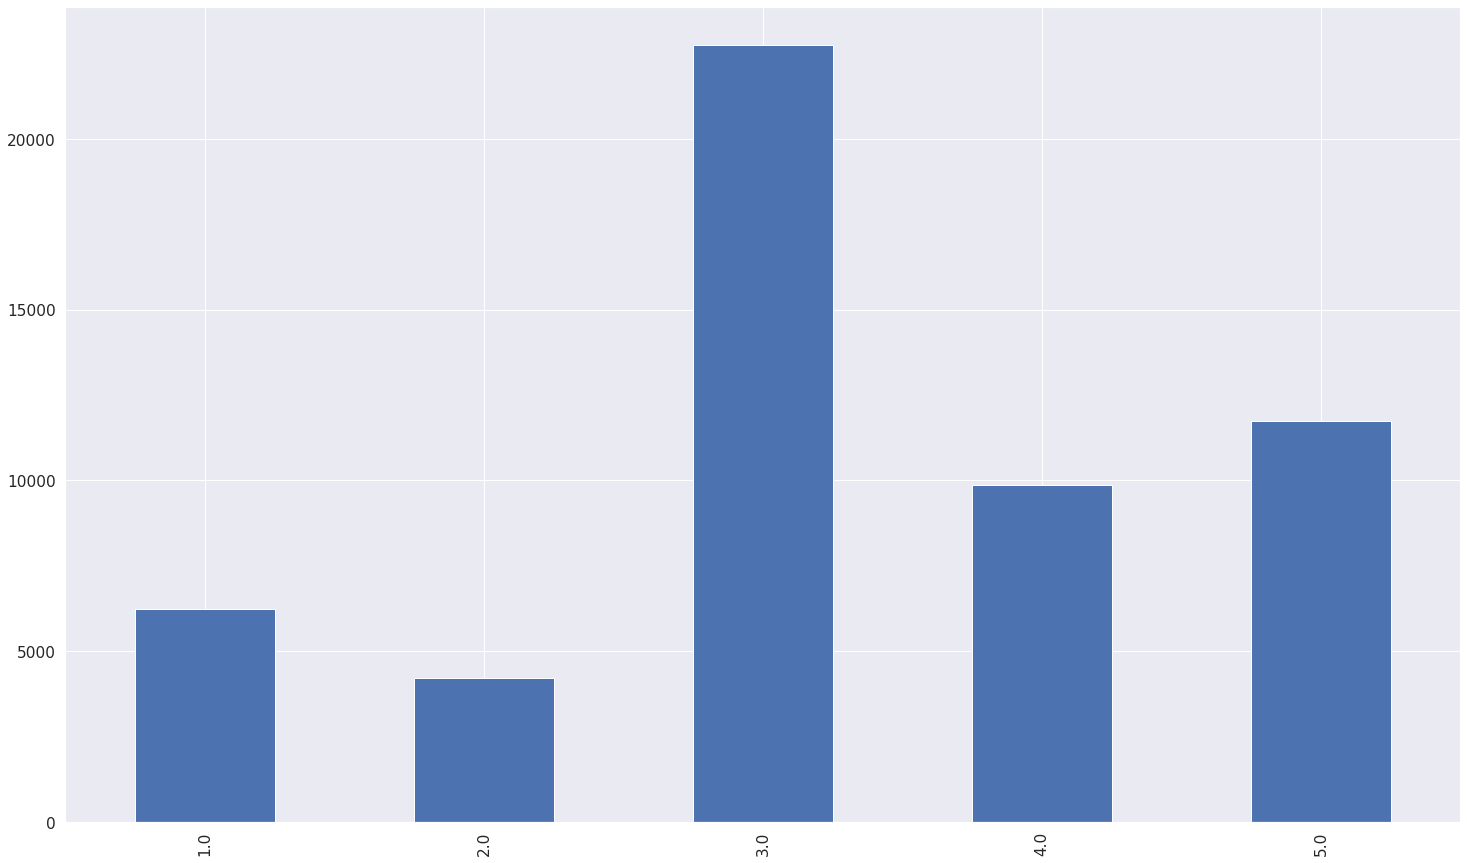

In [225]:
train['previous_year_rating'].value_counts().sort_index().head(50).plot.bar()

/home/pcuser/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pcuser/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pcuser/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/pcuser/.local/lib/python3.6/site-packages/pa

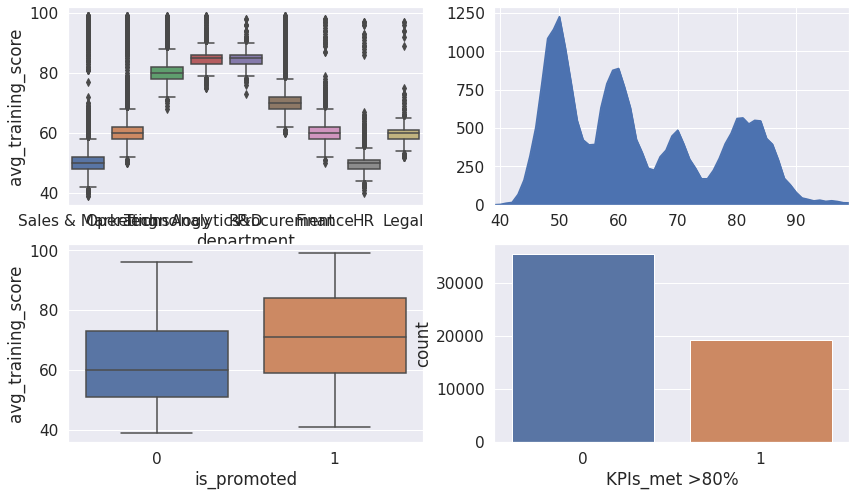

In [226]:
fig,axrr=plt.subplots(2,2,figsize=(14,8))

df= train[train.department.isin(train.department.value_counts().head(10).index)]
sns.boxplot(x='department',y='avg_training_score',data=df,ax=axrr[0][0])


test['avg_training_score'].value_counts().sort_index()[:1000].plot.area(ax=axrr[0][1])


sns.boxplot(x='is_promoted',y='avg_training_score',data=train,ax=axrr[1][0])

sns.countplot(train['KPIs_met >80%'],ax=axrr[1][1])


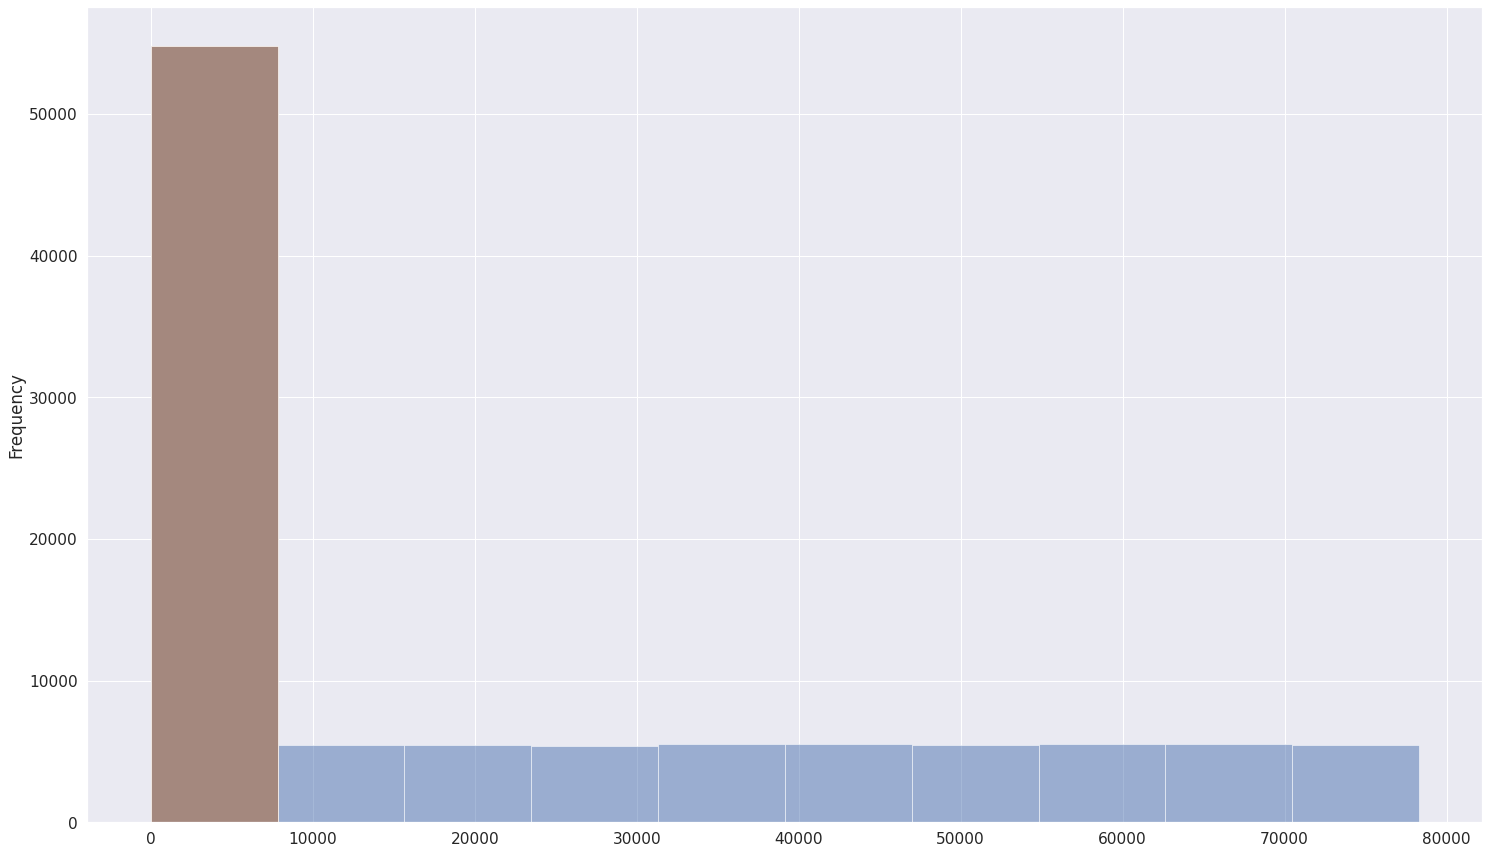

In [227]:
train.plot.hist(alpha=0.5, bins=10, grid=True, legend=None)

#Encoding the categorical data

**Before Encoding drop the un necesary column**

In [228]:
train = train.drop(['employee_id'],axis = 1)
test = test.drop(['employee_id'],axis = 1)

In [229]:
le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.transform(test['department'])
train['region'] = le.fit_transform(train['region'])
test['region'] = le.transform(test['region'])
train['education'] = le.fit_transform(train['education'])
test['education'] = le.transform(test['education'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.transform(test['gender'])
train['recruitment_channel'] = le.fit_transform(train['recruitment_channel'])
test['recruitment_channel'] = le.transform(test['recruitment_channel'])

In [230]:
train1 = train.drop(['recruitment_channel'],axis = 1)
test1 = test.drop(['recruitment_channel'],axis = 1)

In [231]:
y = train['is_promoted']
x = train.drop(['is_promoted'],axis = 1)

In [232]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x = sc.fit_transform(x)
# test = sc.fit_transform(test)

In [233]:
train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,tot_score
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0,6.0,49
1,4,14,1,1,0,1,30,5.0,4,0,0,60,0,5.0,60
2,7,10,1,1,2,1,34,3.0,7,0,0,50,0,3.0,50
3,7,15,1,1,0,2,39,1.0,10,0,0,50,0,1.0,100
4,8,18,1,1,0,1,45,3.0,2,0,0,73,0,3.0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,1,1,2,1,48,3.0,17,0,0,78,0,3.0,78
54804,4,19,2,0,0,1,37,2.0,6,0,0,56,0,2.0,56
54805,0,0,1,1,0,1,27,5.0,3,1,0,79,0,6.0,79
54806,7,33,1,1,2,1,29,1.0,2,0,0,45,0,1.0,45


### seperating X and Y from Train data

In [234]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#Creating Model

**LGB Classifier**

In [235]:
# params = {
#     'application': 'binary', # for binary classification
# #     'num_class' : 1, # used for multi-classes
#     'boosting': 'gbdt', # traditional gradient boosting decision tree
#     'num_iterations': 100, 
#     'learning_rate': 0.01,
#     'num_leaves': 600,
#     'device': 'cpu', # you can use GPU to achieve faster learning
#     'max_depth': -1, # <0 means no limit
#     'max_bin': 510, # Small number of bins may reduce training accuracy but can deal with over-fitting
#     'lambda_l1': 5, # L1 regularization
#     'lambda_l2': 10, # L2 regularization
#     'metric' : 'binary_error',
#     'subsample_for_bin': 200, # number of samples for constructing bins
#     'subsample': 0.8715623, # subsample ratio of the training instance
#     'colsample_bytree': 0.8, # subsample ratio of columns when constructing the tree
#     'min_split_gain': 0.5, # minimum loss reduction required to make further partition on a leaf node of the tree
#     'min_child_weight': 1, # minimum sum of instance weight (hessian) needed in a leaf
#     'min_child_samples': 5# minimum number of data needed in a leaf
# }

In [236]:
# # Initiate classifier to use
# mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
#           objective = 'binary', 
#           n_jobs = -1, 
#           silent = True,
#           max_depth = params['max_depth'],
#           max_bin = params['max_bin'], 
#           subsample_for_bin = params['subsample_for_bin'],
#           subsample = params['subsample'], 
#           min_split_gain = params['min_split_gain'], 
#           min_child_weight = params['min_child_weight'], 
#         min_child_samples = params['min_child_samples'])

In [237]:
# mdl.get_params().keys()


In [238]:
# gridParams = {
#     'learning_rate': [0.005, 0.01],
#     'n_estimators': [10000,1000,15000],
#     'num_leaves': [300,600,450], # large num_leaves helps improve accuracy but might lead to over-fitting
#     'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
#     'objective' : ['binary'],
#     'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
#     'random_state' : [500],
#     'colsample_bytree' : [0.64, 0.65, 0.66],
#     'subsample' : [0.7,0.75],
#     'reg_alpha' : [1,1.2],
#     'reg_lambda' : [1,1.2,1.4],
#     }

In [239]:
# grid = GridSearchCV(mdl, gridParams, verbose=1, cv=4, n_jobs=-1)
# # Run the grid
# grid.fit(x, y)

# # Print the best parameters found
# print(grid.best_params_)
# print(grid.best_score_)

In [240]:
# best = lgb.LGBMClassifier(objective="binary",n_estimators=10000,reg_alpha=0.1,reg_lambda=0.1,n_jobs=-1,colsample_bytree=.8,min_ch,num_leaves=600,learning_rate=0.01,max_depth=15)
# best.fit(X_train,y_train,eval_metric='f1')

In [241]:
import time
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(
    objective='binary',
    boosting='gbdt',
    n_jobs=-1,
    learning_rate = 0.05,
    max_depth = -1,
    num_leaves = 600,
    n_estimators = 10000,
    bagging_fraction = 0.8,
    feature_fraction = 0.9)
    #reg_alpha = 0.2,
    #reg_lambda = 0.4)
t = time.time()

In [242]:
lgb.fit(X_train,y_train,eval_metric='f1')

LGBMClassifier(bagging_fraction=0.8, boosting='gbdt', boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=10000, n_jobs=-1, num_leaves=600,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [243]:
lgbm_predicted = lgb.predict(X_test)

In [244]:
lgbm_acc = accuracy_score(y_test,lgbm_predicted)
print(lgbm_acc)

0.9298943992923094


Text(43.5, 0.5, 'Original Class')

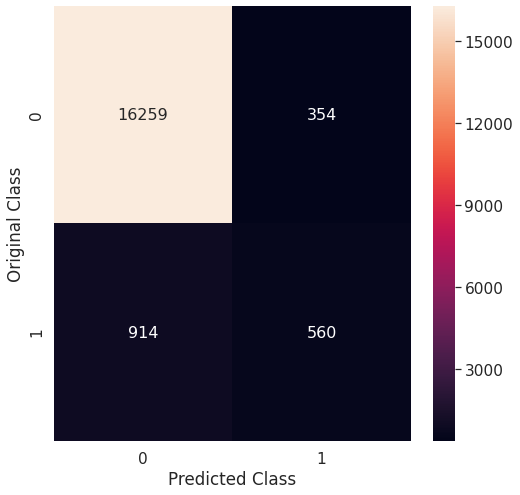

In [245]:
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, lgbm_predicted), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')

In [246]:
lgbm_precision = precision_score(y_test,lgbm_predicted)
print(lgbm_precision)

0.612691466083151


In [247]:
lgbm_f1 = f1_score(y_test,lgbm_predicted)
print(lgbm_f1)

0.46901172529313234


In [248]:
lgbm_submi = pd.read_csv('sample_submission.csv')
print(lgbm_submi.head())

   employee_id  is_promoted
0         8724            0
1        74430            0
2        72255            0
3        38562            0
4        64486            0


In [249]:
lgbm_submi['is_promoted'] = lgb.predict(test)
print(lgbm_submi.head())
lgbm_submi.to_csv('lgbm_final_scaler.csv',index=False)

   employee_id  is_promoted
0         8724            0
1        74430            0
2        72255            0
3        38562            0
4        64486            0


In [250]:
from xgboost import XGBClassifier

In [251]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=10000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)

In [253]:
xgb1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.001, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [254]:
xgb_pred = xgb1.predict(X_test)

In [255]:
xgb_acc = accuracy_score(y_test,xgb_pred)
print(xgb_acc)

0.9442140764084702


Text(43.5, 0.5, 'Original Class')

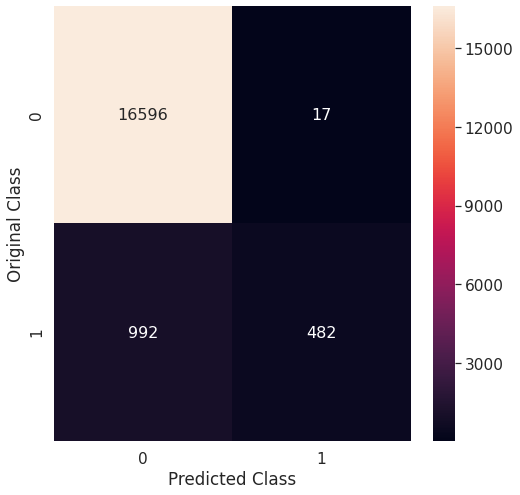

In [256]:
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, xgb_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')

In [257]:
sub = pd.read_csv("sample_submission.csv")
sub.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [259]:
sub['is_promoted'] = xgb1.predict(test)
sub.to_csv('xgb_final.csv',index=False)

In [260]:
xgb_precesion = precision_score(y_test,xgb_pred)
xgb_f1 = f1_score(y_test,xgb_pred)

In [261]:
print(xgb_precesion)
print(xgb_f1)

0.9659318637274549
0.48859604662949824


In [269]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [284]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [287]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators':[1000,1500,10000],
    
        }
folds = 3

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, 
                                   cv=skf.split(X_train,y_train),verbose=3, random_state=1001)

# Here we go
start_time =timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 10.7min finished



 Time taken: 0 hours 11 minutes and 3.81 seconds.


In [288]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([ 64.06126006,  36.82033118, 399.50136685, 206.8188839 ,
        28.03830711]), 'std_fit_time': array([ 0.60006981,  0.29511771,  1.24517083, 40.61146067,  0.39933864]), 'mean_score_time': array([ 2.45182888,  0.77571019,  7.99647824, 10.70775096,  1.02496862]), 'std_score_time': array([0.54736283, 0.07353187, 0.51802605, 3.3493568 , 0.03461088]), 'param_subsample': masked_array(data=[0.8, 1.0, 0.8, 0.8, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[1500, 1500, 10000, 10000, 1000],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 5, 10, 5, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[5, 3, 5, 4, 5],
             mask=[False, False, False, Fa

In [290]:
xgb2 = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=np.nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=1.0,
              tree_method=None, validate_parameters=False, verbosity=None)

In [291]:
xgb2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=1.0,
              tree_method=None, validate_parameters=False, verbosity=None)

In [292]:
xbg2_pred = xgb2.predict(X_test)

In [293]:
xgb2_acc = accuracy_score(y_test,xbg2_pred)
print(xgb2_acc)

0.9457621496102173


Text(43.5, 0.5, 'Original Class')

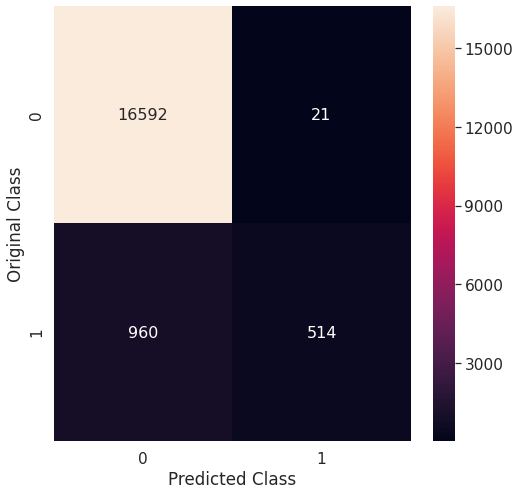

In [294]:
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, xbg2_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')

In [296]:
xgb2_precesion = precision_score(y_test,xbg2_pred)
xgb2_f1 = f1_score(y_test,xbg2_pred)
print(xgb2_precesion)
print(xgb2_f1)

0.9607476635514018
0.5116973618715779


In [297]:
sub['is_promoted'] = xgb2.predict(test)
sub.to_csv('xgb_grid_search.csv',index=False)

In [301]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-20.1.1-py2.py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.1
    Uninstalling pip-20.1:
      Successfully uninstalled pip-20.1


In [300]:
!pip3 install catboost


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 64.8 MB 22 kB/s  eta 0:00:01     |███████████████████████████████ | 62.9 MB 185 kB/s eta 0:00:11
     |████████████████████████████████| 11.5 MB 200 kB/s eta 0:00:01
Processing /home/pcuser/.cache/pip/wheels/ac/cb/8a/b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf/retrying-1.3.3-py3-none-any.whl
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [317]:
from sklearn.metrics import mean_squared_error,roc_auc_score,recall_score

In [320]:
def model_evalution(model):
  print("####################### model Evalution started #######################")
  train_pre = model.predict(X_train)
  test_pre = model.predict(X_test)
  train_pro = model.predict_proba(X_train)
  test_pro = model.predict_proba(X_test)
  
  print("Train Accuracy: {0} \t Test Accuracy: {1}".format(accuracy_score(y_train, train_pre),accuracy_score(y_test,test_pre)))
  print("Train Loss: {0} \t Test Loss: {1}".format(mean_squared_error(y_train, train_pre),mean_squared_error(y_test,test_pre)))
  print("Train AUC: {0} \t Test AUC: {1}".format(roc_auc_score(y_train, train_pro[:,1]),roc_auc_score(y_test,test_pro[:,1])))
  print("Train F1: {0} \t Test F1: {1}".format(f1_score(y_train, train_pre),f1_score(y_test,test_pre)))
  print("Train recall: {0} \t Test recall: {1}".format(recall_score(y_train, train_pre),recall_score(y_test,test_pre)))
  print("Train precision: {0} \t Test Precision: {1}".format(precision_score(y_train, train_pre),precision_score(y_test,test_pre)))
  print("Train Confusion Matrix: \n{0} \n Test Confusion Matrix: \n{1}".format(confusion_matrix(y_train, train_pre),confusion_matrix(y_test,test_pre)))
  #f1_score

In [321]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=400,verbose=True,eval_metric="F1",learning_rate=0.2,class_weights=[1,3],depth=3,l2_leaf_reg=100,bagging_temperature=0.5)
catboost_model.fit(X_train, y_train,eval_set=(X_test, y_test),use_best_model=False)
model_evalution(catboost_model)

0:	learn: 0.3094034	test: 0.3153301	best: 0.3153301 (0)	total: 14.1ms	remaining: 5.61s
1:	learn: 0.3155250	test: 0.3252296	best: 0.3252296 (1)	total: 26ms	remaining: 5.18s
2:	learn: 0.2799476	test: 0.2927928	best: 0.3252296 (1)	total: 38.3ms	remaining: 5.06s
3:	learn: 0.3029688	test: 0.3109091	best: 0.3252296 (1)	total: 49.7ms	remaining: 4.92s
4:	learn: 0.3104754	test: 0.3199566	best: 0.3252296 (1)	total: 61.3ms	remaining: 4.84s
5:	learn: 0.3095823	test: 0.3146930	best: 0.3252296 (1)	total: 73.4ms	remaining: 4.82s
6:	learn: 0.3265544	test: 0.3293737	best: 0.3293737 (6)	total: 84.5ms	remaining: 4.74s
7:	learn: 0.3246905	test: 0.3271349	best: 0.3293737 (6)	total: 95.6ms	remaining: 4.68s
8:	learn: 0.3264897	test: 0.3306321	best: 0.3306321 (8)	total: 107ms	remaining: 4.64s
9:	learn: 0.3300874	test: 0.3350090	best: 0.3350090 (9)	total: 118ms	remaining: 4.6s
10:	learn: 0.3298076	test: 0.3335132	best: 0.3350090 (9)	total: 129ms	remaining: 4.58s
11:	learn: 0.3291097	test: 0.3316529	best: 0.335

95:	learn: 0.5497839	test: 0.5506937	best: 0.5507777 (89)	total: 1.25s	remaining: 3.97s
96:	learn: 0.5512802	test: 0.5497789	best: 0.5507777 (89)	total: 1.27s	remaining: 3.96s
97:	learn: 0.5515876	test: 0.5506011	best: 0.5507777 (89)	total: 1.28s	remaining: 3.95s
98:	learn: 0.5510897	test: 0.5508526	best: 0.5508526 (98)	total: 1.3s	remaining: 3.95s
99:	learn: 0.5526260	test: 0.5510949	best: 0.5510949 (99)	total: 1.32s	remaining: 3.96s
100:	learn: 0.5528547	test: 0.5487805	best: 0.5510949 (99)	total: 1.33s	remaining: 3.95s
101:	learn: 0.5530833	test: 0.5487805	best: 0.5510949 (99)	total: 1.35s	remaining: 3.94s
102:	learn: 0.5532335	test: 0.5485296	best: 0.5510949 (99)	total: 1.36s	remaining: 3.92s
103:	learn: 0.5536444	test: 0.5482790	best: 0.5510949 (99)	total: 1.37s	remaining: 3.9s
104:	learn: 0.5535853	test: 0.5496113	best: 0.5510949 (99)	total: 1.38s	remaining: 3.89s
105:	learn: 0.5533960	test: 0.5488642	best: 0.5510949 (99)	total: 1.39s	remaining: 3.87s
106:	learn: 0.5537091	test: 

189:	learn: 0.5750520	test: 0.5632873	best: 0.5646636 (187)	total: 2.94s	remaining: 3.25s
190:	learn: 0.5752684	test: 0.5633718	best: 0.5646636 (187)	total: 2.96s	remaining: 3.24s
191:	learn: 0.5754848	test: 0.5633718	best: 0.5646636 (187)	total: 2.98s	remaining: 3.22s
192:	learn: 0.5755246	test: 0.5644944	best: 0.5646636 (187)	total: 2.99s	remaining: 3.21s
193:	learn: 0.5760764	test: 0.5663426	best: 0.5663426 (193)	total: 3s	remaining: 3.19s
194:	learn: 0.5765878	test: 0.5667314	best: 0.5667314 (194)	total: 3.01s	remaining: 3.17s
195:	learn: 0.5775689	test: 0.5674585	best: 0.5674585 (195)	total: 3.02s	remaining: 3.15s
196:	learn: 0.5775689	test: 0.5674585	best: 0.5674585 (195)	total: 3.03s	remaining: 3.13s
197:	learn: 0.5789874	test: 0.5701925	best: 0.5701925 (197)	total: 3.05s	remaining: 3.11s
198:	learn: 0.5796961	test: 0.5696373	best: 0.5701925 (197)	total: 3.06s	remaining: 3.09s
199:	learn: 0.5785581	test: 0.5677979	best: 0.5701925 (197)	total: 3.07s	remaining: 3.07s
200:	learn: 0

288:	learn: 0.5978908	test: 0.5770588	best: 0.5790247 (286)	total: 4.63s	remaining: 1.78s
289:	learn: 0.5980134	test: 0.5766004	best: 0.5790247 (286)	total: 4.65s	remaining: 1.76s
290:	learn: 0.5976872	test: 0.5765156	best: 0.5790247 (286)	total: 4.66s	remaining: 1.75s
291:	learn: 0.5983784	test: 0.5765156	best: 0.5790247 (286)	total: 4.69s	remaining: 1.73s
292:	learn: 0.5967906	test: 0.5776014	best: 0.5790247 (286)	total: 4.7s	remaining: 1.72s
293:	learn: 0.5970755	test: 0.5776014	best: 0.5790247 (286)	total: 4.71s	remaining: 1.7s
294:	learn: 0.5971564	test: 0.5774317	best: 0.5790247 (286)	total: 4.72s	remaining: 1.68s
295:	learn: 0.5971160	test: 0.5775165	best: 0.5790247 (286)	total: 4.74s	remaining: 1.66s
296:	learn: 0.5976451	test: 0.5780585	best: 0.5790247 (286)	total: 4.75s	remaining: 1.65s
297:	learn: 0.5960534	test: 0.5771437	best: 0.5790247 (286)	total: 4.76s	remaining: 1.63s
298:	learn: 0.5951961	test: 0.5762612	best: 0.5790247 (286)	total: 4.78s	remaining: 1.61s
299:	learn: 

393:	learn: 0.6141732	test: 0.5800234	best: 0.5806735 (344)	total: 6.35s	remaining: 96.6ms
394:	learn: 0.6140187	test: 0.5793164	best: 0.5806735 (344)	total: 6.37s	remaining: 80.7ms
395:	learn: 0.6140187	test: 0.5793164	best: 0.5806735 (344)	total: 6.39s	remaining: 64.5ms
396:	learn: 0.6139777	test: 0.5794010	best: 0.5806735 (344)	total: 6.4s	remaining: 48.4ms
397:	learn: 0.6144192	test: 0.5786090	best: 0.5806735 (344)	total: 6.41s	remaining: 32.2ms
398:	learn: 0.6147377	test: 0.5776997	best: 0.5806735 (344)	total: 6.42s	remaining: 16.1ms
399:	learn: 0.6152512	test: 0.5782393	best: 0.5806735 (344)	total: 6.43s	remaining: 0us

bestTest = 0.5806734993
bestIteration = 344

####################### model Evalution started #######################
Train Accuracy: 0.9331989869556929 	 Test Accuracy: 0.9306684358931829
Train Loss: 0.06680101304430708 	 Test Loss: 0.06933156410681705
Train AUC: 0.9274105969676231 	 Test AUC: 0.9107258819804112
Train F1: 0.5561787588203365 	 Test F1: 0.5124416796

#Logistic Regression 

In [42]:
clf = LogisticRegression(random_state=0,solver = 'liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred=clf.predict(X_test)

In [56]:
len(y_pred)

18087

In [44]:
# matrix = confusion_matrix(y_test,y_pred)
value = accuracy_score(y_test,y_pred)
print(value)

0.9203295184386576


Text(43.5, 0.5, 'Original Class')

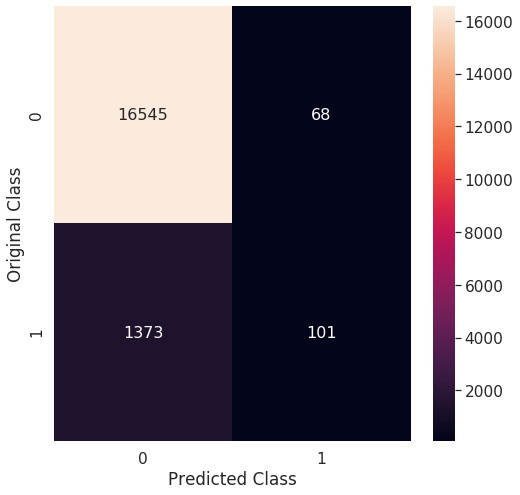

In [45]:
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')

In [46]:
pres = precision_score(y_test, y_pred)
print(pres)

0.5976331360946746


In [47]:
f1 = f1_score(y_test, y_pred,average='micro')
print(f1)
print(f1*100)

0.9203295184386576
92.03295184386576


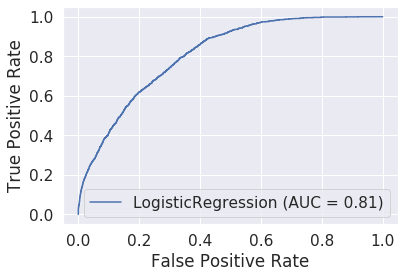

In [48]:
metrics.plot_roc_curve(clf,X_test,y_test)

In [49]:
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
recal = recall_score(y_test,y_pred)
print(recal)

0.06852103120759837


In [50]:
submi = pd.read_csv('sample_submission.csv')
print(submi.head())

   employee_id  is_promoted
0         8724            0
1        74430            0
2        72255            0
3        38562            0
4        64486            0


In [51]:
predddd = clf.predict(test)
print(predddd)

[0 0 0 ... 0 0 0]


In [0]:
submi['is_promoted'] = clf.predict(test)

In [0]:
submi.to_csv("Final_submission.csv", index=False)

#Other Algorithm